In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

In [29]:
df = pd.read_csv('data/cities_r2.csv')

In [30]:
# We are interested in the 'effective_literacy_rate_total' column for clustering
df_literacy = df[['effective_literacy_rate_total']]

In [31]:
print(df_literacy.isnull().sum())

effective_literacy_rate_total    0
dtype: int64


In [32]:
scaler = StandardScaler()
df_literacy_scaled = scaler.fit_transform(df_literacy)

In [33]:
Z = linkage(df_literacy_scaled, method='ward')

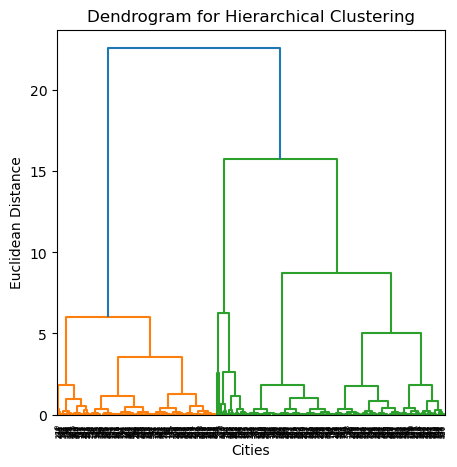

In [34]:
# Step 4: Plot the Dendrogram to decide the number of clusters
plt.figure(figsize=(5, 5))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Cities')
plt.ylabel('Euclidean Distance')
plt.show()

In [38]:
# Fit the model with 3 clusters
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
# Add the cluster labels to the original dataframe
df['Cluster'] = hc.fit_predict(df_literacy_scaled)

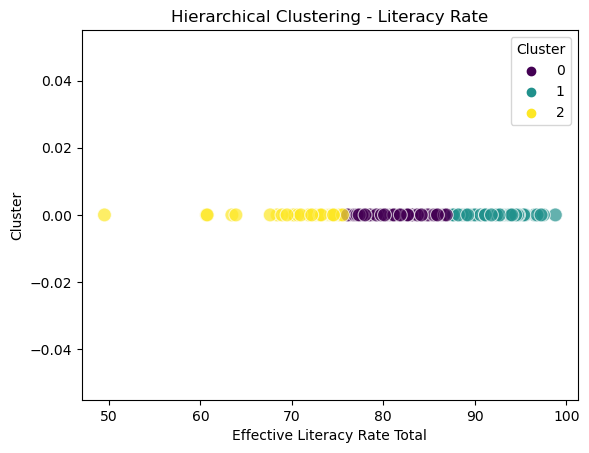

In [39]:
# Step 6: Visualizing the clusters
# Here we plot the cities based on their effective literacy rate and color them by clusters
sns.scatterplot(x=df['effective_literacy_rate_total'], 
                y=np.zeros_like(df['effective_literacy_rate_total']), 
                hue=df['Cluster'], 
                palette='viridis', 
                s=100, alpha=0.7)
plt.title('Hierarchical Clustering - Literacy Rate')
plt.xlabel('Effective Literacy Rate Total')
plt.ylabel('Cluster')
plt.show()

In [41]:
print(df[['name_of_city', 'effective_literacy_rate_total', 'Cluster']])

      name_of_city  effective_literacy_rate_total  Cluster
0          Abohar                           79.86        0
1        Achalpur                           91.99        1
2        Adilabad                           80.51        0
3       Adityapur                           83.46        0
4           Adoni                           68.38        2
..             ...                            ...      ...
488  Vizianagaram                           81.85        0
489      Warangal                           84.16        0
490        Wardha                           94.05        1
491   Yamunanagar                           85.91        0
492      Yavatmal                           91.81        1

[493 rows x 3 columns]
